### Exploratory Data Analysis for the IMDb Movie Reviews dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from datasets import load_dataset

seed = 1234
np.random.seed(seed)

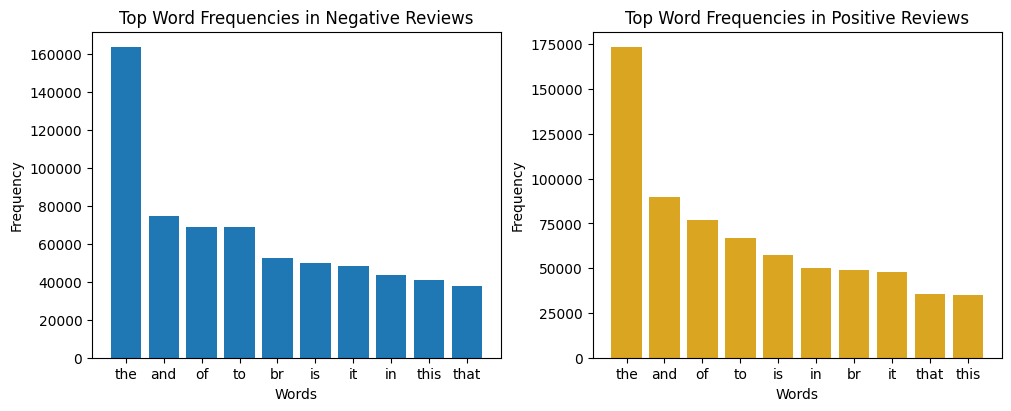

In [10]:
# Load the data
imdb = load_dataset("imdb").shuffle(seed)
train_text = imdb["train"]["text"]
train_labels = np.array(imdb["train"]["label"])

# Vectorize the text data into a "Bag of Words" representation
vectorizer = CountVectorizer()
bow = vectorizer.fit_transform(train_text)

# Plot frequencies of the k most common words across reviews in each class
def word_frequencies(bag_of_words, train_labels, vec, k) -> None:
    negative = bag_of_words[train_labels == 0].sum(axis=0).tolist()[0]
    positive = bag_of_words[train_labels == 1].sum(axis=0).tolist()[0]
    words = vec.get_feature_names_out()

    fig, axes = plt.subplots(1, 2, figsize=(10, 4), layout="constrained")

    axes[0].bar(words[np.argsort(negative)[-k:][::-1]], np.sort(negative)[-k:][::-1])
    axes[0].set_xlabel("Words")
    axes[0].set_ylabel("Frequency")
    axes[0].set_title("Top Word Frequencies in Negative Reviews")

    axes[1].bar(words[np.argsort(positive)[-k:][::-1]], np.sort(positive)[-k:][::-1], color="goldenrod")
    axes[1].set_xlabel("Words")
    axes[1].set_ylabel("Frequency")
    axes[1].set_title("Top Word Frequencies in Positive Reviews")

word_frequencies(bow, train_labels, vectorizer, 10)

Without any preprocessing, conjunctions and other words that have little sentiment-related meaning dominate the dataset. Fortunately, SKLearn provides the TfidfVectorizer which applys the tf-idf transform to a bag of words representation. Tf-idf stands for term frequency times inverse document frequency, which will help diminish the impact of common terms across the corpus that do not provide meaningful information to the classification task at hand. We can also use a stopwords list to remove preselected English words which are known to have little importance to the classification task.

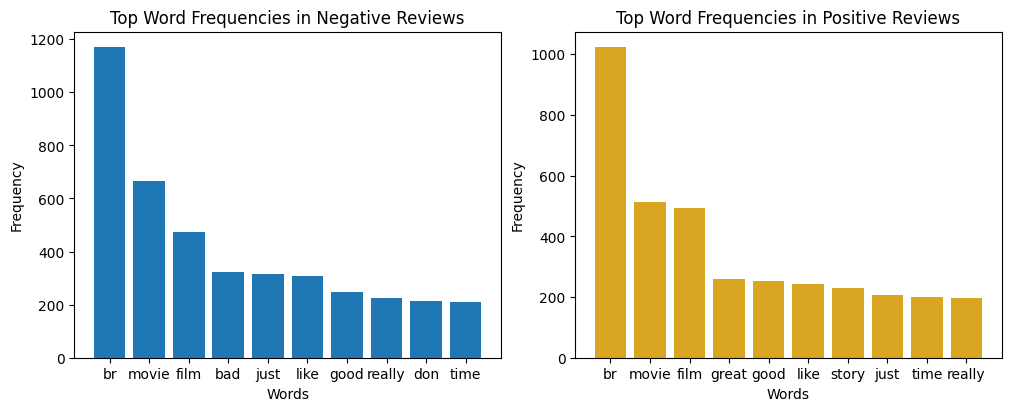

In [11]:
new_vec = TfidfVectorizer(stop_words="english")
new_bow = new_vec.fit_transform(train_text)
word_frequencies(new_bow, train_labels, new_vec, 10)

Another metric of interest is seeing how the length of reviews might differ across the two classes.

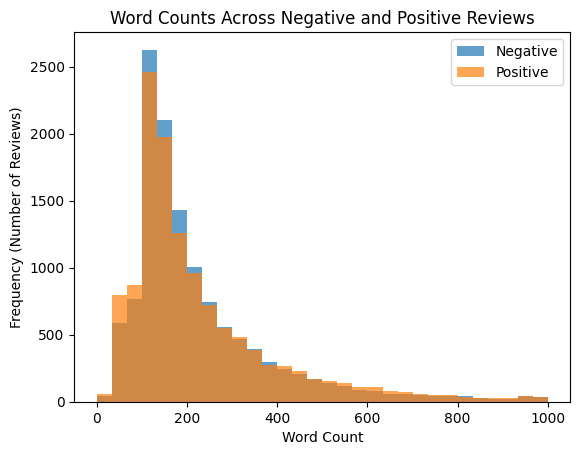

In [32]:
def review_lengths(bag_of_words, train_labels, k) -> None:
    negative = bag_of_words[train_labels == 0].sum(axis=1).flatten().tolist()[0]
    positive = bag_of_words[train_labels == 1].sum(axis=1).flatten().tolist()[0]
    
    plt.hist(negative, label="Negative", alpha=0.7, histtype='stepfilled', bins=30, range=(0, 1000))
    plt.hist(positive, label="Positive", alpha=0.7, histtype='stepfilled', bins=30, range=(0, 1000))
    plt.xlabel("Word Count")
    plt.ylabel("Frequency (Number of Reviews)")
    plt.title("Word Counts Across Negative and Positive Reviews")
    plt.legend()



review_lengths(bow, train_labels, 10)


We observe that the distributions of word lengths are quite similar across the two classes, so it is less likely to be an important feature during the classification task.